In [1]:
# Imports and Setup
import pandas as pd
import os
import matplotlib.pyplot as plt

# Folder path for merged data
merged_dir = "merged_energy_temp"
file_list = [f for f in os.listdir(merged_dir) if f.endswith("_merged.csv")]
print(f"Found {len(file_list)} merged files.")


Found 12 merged files.


In [2]:
# Summary Report of All Files
summary = []
for filename in file_list:
    path = os.path.join(merged_dir, filename)
    df = pd.read_csv(path, index_col=0, parse_dates=True)

    region = filename.split("_")[0]
    temp_min = df["Estimated_Temp_C"].min()
    temp_max = df["Estimated_Temp_C"].max()
    mw_col = df.columns[0]  # assuming the first column is MW
    mw_min = df[mw_col].min()
    mw_max = df[mw_col].max()
    date_min = df.index.min().date()
    date_max = df.index.max().date()

    summary.append({
        "Region": region,
        # "Date Range": f"{date_min} ~ {date_max}",
        "MW Range": f"{mw_min:.2f} ~ {mw_max:.2f}",
        "Temp Range": f"{temp_min:.2f} ~ {temp_max:.2f}",
        "Rows": len(df)
    })

pd.DataFrame(summary).sort_values("Region").reset_index(drop=True)


summary_df = pd.DataFrame(summary).sort_values("Region").reset_index(drop=True)
print(f"\n📊 Total rows combined: {summary_df['Rows'].sum()}")
summary_df


📊 Total rows combined: 45443


,Region,MW Range,Temp Range,Rows
0,AEP,11078.04 ~ 22847.88,-1.12 ~ 27.18,5055
1,COMED,8148.75 ~ 19920.29,-4.89 ~ 26.29,2772
2,DAYTON,1366.33 ~ 3136.62,-5.71 ~ 26.54,5055
3,DEOK,1219.00 ~ 4503.46,-0.55 ~ 27.60,2407
4,DOM,7772.00 ~ 18976.62,2.76 ~ 26.29,4843
5,DUQ,1188.17 ~ 2589.00,-6.76 ~ 24.97,4963
6,EKPC,601.96 ~ 2987.21,0.84 ~ 24.87,1890
7,FE,5685.29 ~ 11753.42,-2.67 ~ 25.18,2621
8,NI,8256.58 ~ 20046.75,-8.28 ~ 24.82,2437
9,PJM,21258.35 ~ 45610.04,-2.76 ~ 26.05,1372


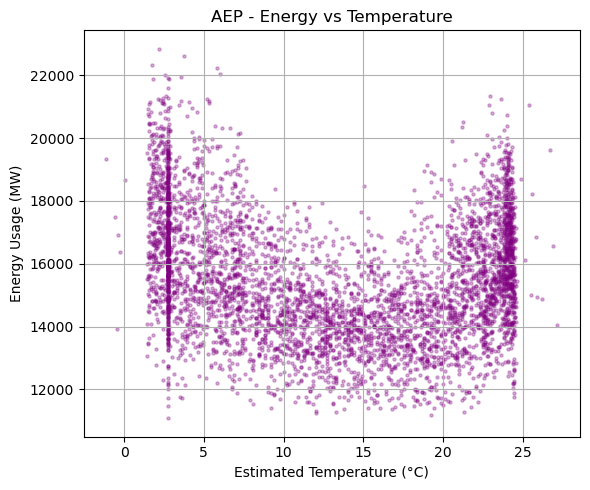

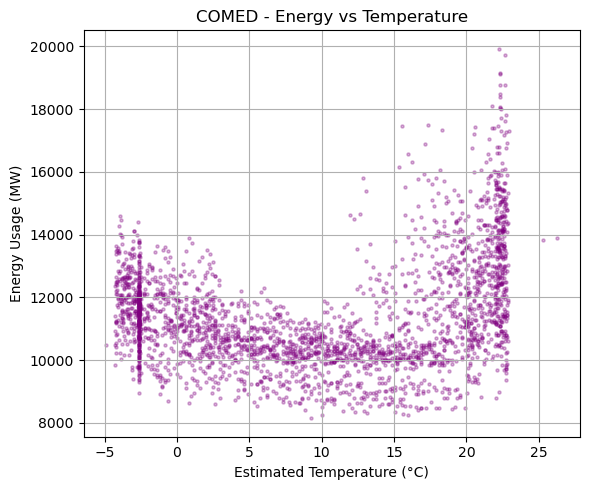

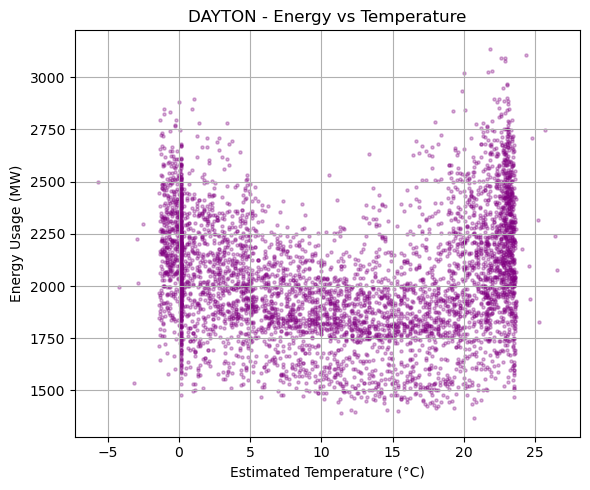

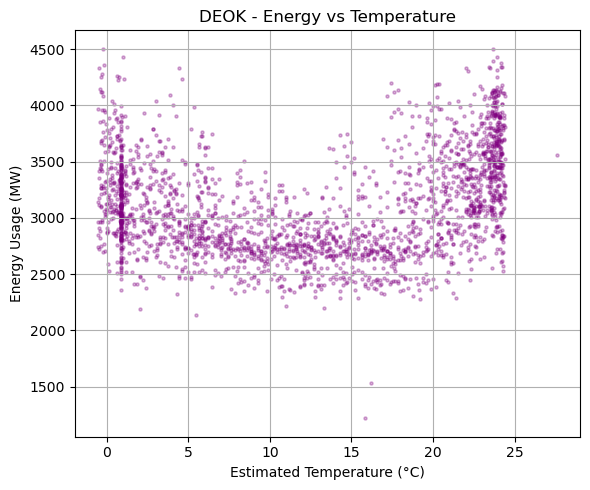

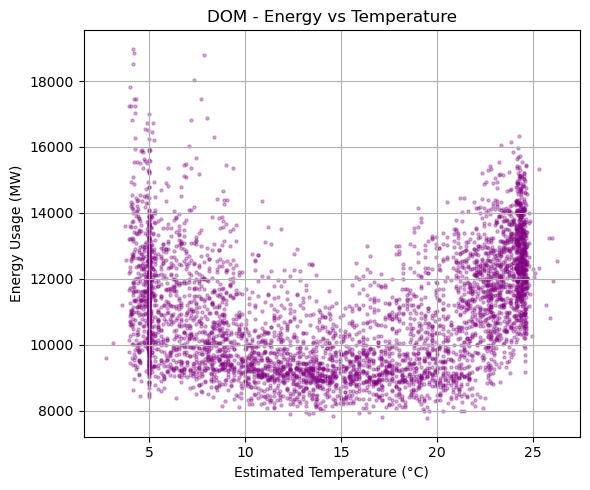

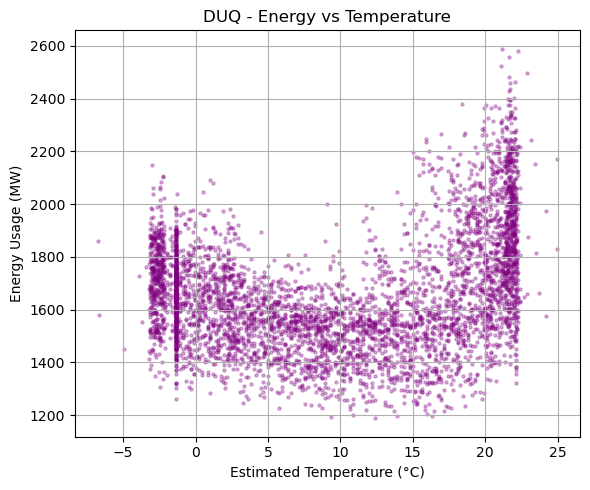

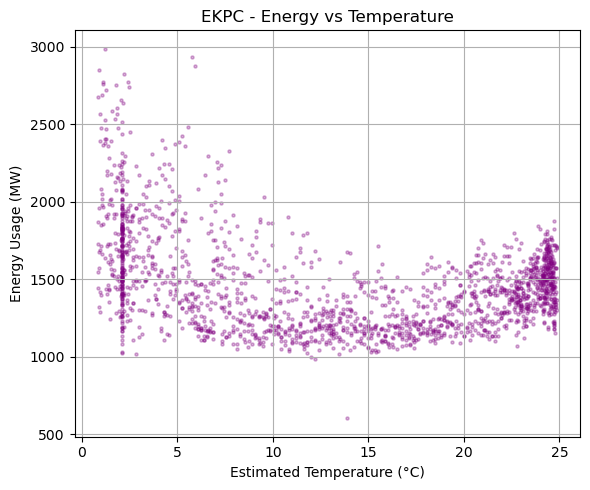

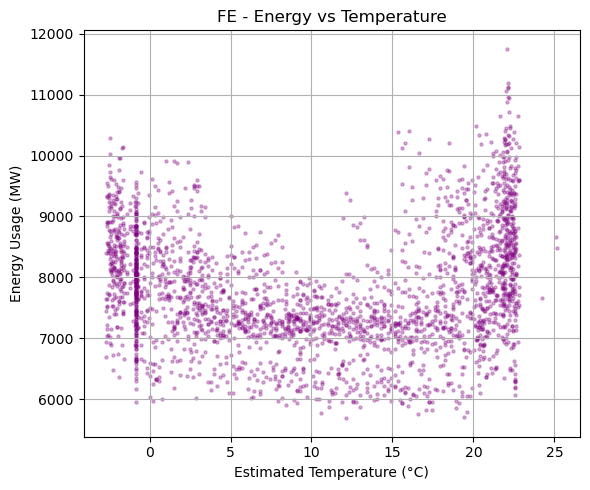

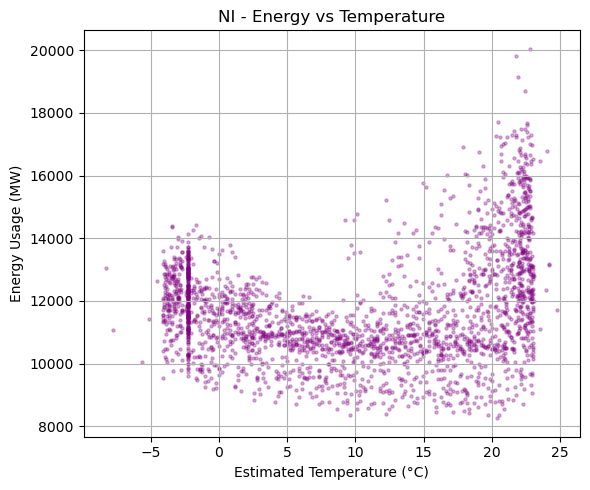

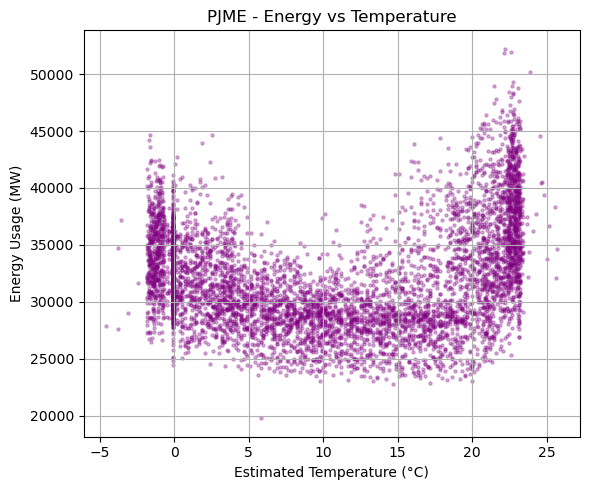

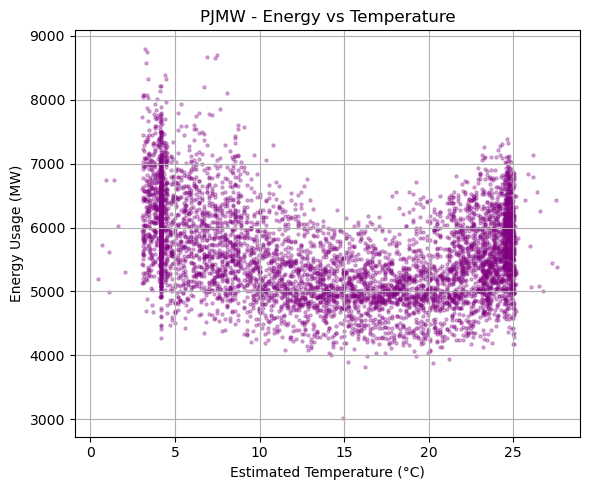

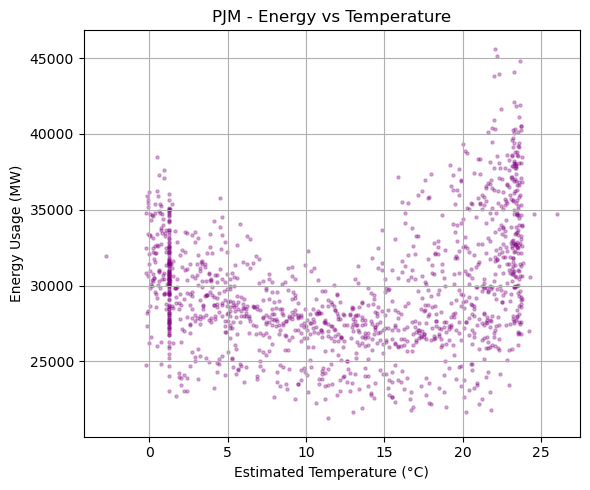

In [3]:
# Visualize All Regions (Energy vs Temperature)
for filename in file_list:
    region = filename.split("_")[0]
    path = os.path.join(merged_dir, filename)
    df = pd.read_csv(path, index_col=0, parse_dates=True)

    mw_col = df.columns[0]
    temp_col = "Estimated_Temp_C"

    plt.figure(figsize=(6, 5))
    plt.scatter(df[temp_col], df[mw_col], alpha=0.3, s=5, color='purple')
    plt.title(f"{region} - Energy vs Temperature")
    plt.xlabel("Estimated Temperature (°C)")
    plt.ylabel("Energy Usage (MW)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


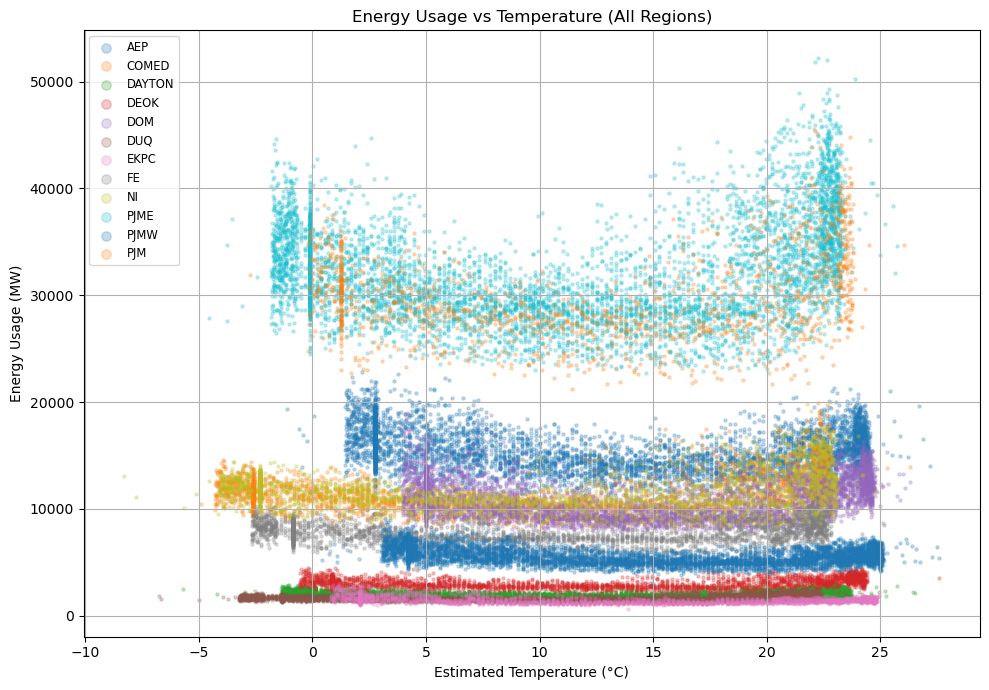

In [4]:
# Combined Plot of All Regions (Energy vs Temperature)
plt.figure(figsize=(10, 7))
for filename in file_list:
    region = filename.split("_")[0]
    path = os.path.join(merged_dir, filename)
    df = pd.read_csv(path, index_col=0, parse_dates=True)

    mw_col = df.columns[0]
    temp_col = "Estimated_Temp_C"

    plt.scatter(df[temp_col], df[mw_col], alpha=0.25, s=5, label=region)

plt.title("Energy Usage vs Temperature (All Regions)")
plt.xlabel("Estimated Temperature (°C)")
plt.ylabel("Energy Usage (MW)")
plt.legend(markerscale=3, fontsize="small", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


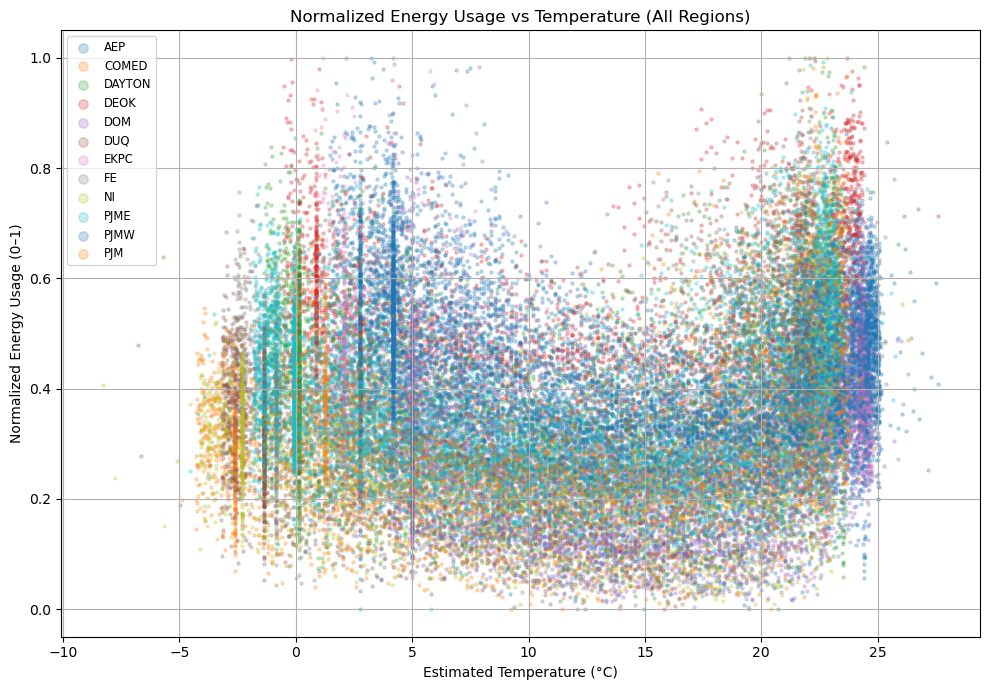

In [5]:
# Combined Plot Using Normalized Energy Values
plt.figure(figsize=(10, 7))
for filename in file_list:
    region = filename.split("_")[0]
    path = os.path.join(merged_dir, filename)
    df = pd.read_csv(path, index_col=0, parse_dates=True)

    mw_col = df.columns[0]
    temp_col = "Estimated_Temp_C"

    # Min-max normalization
    df["Normalized_Energy"] = (df[mw_col] - df[mw_col].min()) / (df[mw_col].max() - df[mw_col].min())

    plt.scatter(df[temp_col], df["Normalized_Energy"], alpha=0.25, s=5, label=region)

plt.title("Normalized Energy Usage vs Temperature (All Regions)")
plt.xlabel("Estimated Temperature (°C)")
plt.ylabel("Normalized Energy Usage (0–1)")
plt.legend(markerscale=3, fontsize="small", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

0: AEP
1: COMED
2: DAYTON
3: DEOK
4: DOM
5: DUQ
6: EKPC
7: FE
8: NI
9: PJM
10: PJME
11: PJMW


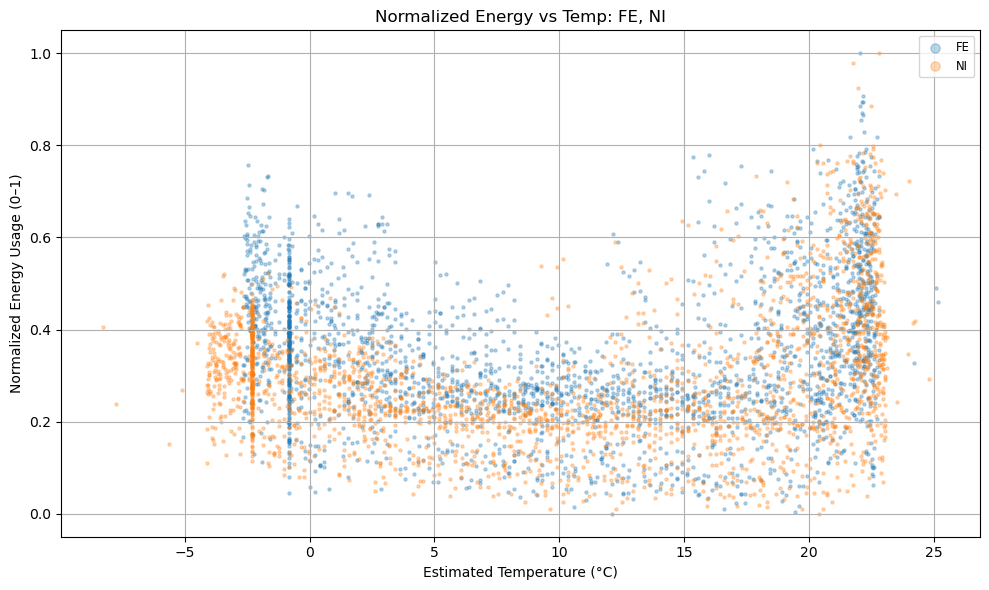

In [6]:
# Select Regions by Numbered List for Normalized Plot

# Define all available region names
region_names = sorted([f.split("_")[0] for f in file_list])
for i, r in enumerate(region_names):
    print(f"{i}: {r}")

# Choose regions by index (e.g. [0, 11])
selected_indices = [7,8]  # ✅ change this to try other combinations
selected_regions = [region_names[i] for i in selected_indices]

# Plot selected normalized regions
plt.figure(figsize=(10, 6))
for filename in file_list:
    region = filename.split("_")[0]
    if region not in selected_regions:
        continue

    path = os.path.join(merged_dir, filename)
    df = pd.read_csv(path, index_col=0, parse_dates=True)

    mw_col = df.columns[0]
    temp_col = "Estimated_Temp_C"
    df["Normalized_Energy"] = (df[mw_col] - df[mw_col].min()) / (df[mw_col].max() - df[mw_col].min())

    plt.scatter(df[temp_col], df["Normalized_Energy"], alpha=0.3, s=5, label=region)

plt.title(f"Normalized Energy vs Temp: {', '.join(selected_regions)}")
plt.xlabel("Estimated Temperature (°C)")
plt.ylabel("Normalized Energy Usage (0–1)")
plt.grid(True)
plt.legend(markerscale=3, fontsize="small", loc="best")
plt.tight_layout()
plt.show()